# __BUDT704 - Project Report__

## __Loan Defaulter Prediction__

#### Group 18 (Runtime Terror): Dishant Vakte, Jeffi Edelbert, Rakshit Sinha, Yatin Koul, Zhanyi Zhu, Zheng Cen


---



## **Introduction**

A major chunk of bank revenue is generated by credit cards. Customers who fail to pay their credit card dues on time could potentially cost banks a lot of revenue. 

Issuing credit cards to customers who have a higher likelihood of not paying their dues on time involves a higher risk for the bank. Issuing these customers' cards with a higher interest rate would work in favor of the bank. Inorder to make a informed decision about which customer is high risk and which one is low risk, the firm would benefit from a predition model which would accurately predict if the customer would default or not. Prediction can be done based on factors like job, education, balance, loans, and house ownership.

Finding out which are the most common factors that defaulters have will also help the bank to be cautious before issuing a credit card to customers who fall into one of those categories.

**Dataset**

Data for analysis is available from Bank Marketing Data Set for a Portugese Bank in http://archive.ics.uci.edu/ml/datasets/Bank+Marketing.

The dataset has 41188 rows and 21 columns. 
The variables are divided into 3 categories. The dataset has varibales for bank client data, data related with last contact to customer of the current campaign and social and economic context attributes. 



## **Choice for Heavier Grading on Data Processing or Data Analysis**

We choose to be heavily graded on **Data Analysis**. 

The dataset for this project is highly imbalanced and would require processing such as creating dummies for categorical values, creating bins for some variables, outlier detection and cleaning, and resampling of dataset.

Although, the crux of the project is the analysis done to identify the right socio-economic factors affecting defaulting and building a machine learning model to predict defaulters. 

Here are the data analysis work done for this project: 

- There are three analysis done to come to a conclusion about which socio-economic factors are important. 
- For machine learning implementation, it is important to know the correlation between the different variables, this is done using a heat map. 
- Three machine learning models have been implemented to find the model with the best fit to make a prediction. Out of this one model is presented as the final product for the firm to use inorder to predict defaulters.

## **Data Processing and Exploratory Data Analysis** 

The categories of variables important to our analysis of loan defaulters are bank client data and economic context attributes. This will allow us to study the customer demgraphics and the socio-economic factors which contribute towards defaulting.  

Our target varibale is 'default'. The clients whose default value is Yes indicates that they do not pay their credit card bills before the due time. While the clients whose default value is No indicates that they successfully pay their credit card before the due time.

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset
df = pd.read_csv('bank-full.csv', sep=';') 
#checking the head
df.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Exploring the shape of the data to determine the number of rows and columns. 

In [ ]:
# checking the shape
df.shape  

(45211, 17)

Exploring information regarding some columns:

The 'default' variable describes if a customer has defaulted on the payment or not. This data is important for the prediction model. Therefore, we are interested in knowing the unique values associated with this variable. We also view unique values in poutcome.

In [ ]:
# checking the catgeories of the columns
df['default'].unique() 

array(['no', 'yes'], dtype=object)

In [ ]:
# checking the catgeories of the columns Term Deposit
df['poutcome'].unique()  

array(['unknown', 'failure', 'other', 'success'], dtype=object)

We observe that not all columns have the right column names. Renaming column names to more appropriate names depending on the data it contains. Renaming 'y' to 'Term Deposit'

In [ ]:
df.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Term Deposit']
df.head() # checking the head

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### __Data Pre-processing__
Data Pre-processing consists of variety of steps such as data cleaning, data manipulation, etc. The purpose is to get the actual picture of the data and making it 'Analysis ready'.<br>
Also determining which varibales we would focus our analysis on. 

Performing descriptive statistics on the data to understand the data further. This would give some insight into the distribution of the numerical data in the dataset.

In [ ]:
# checking descriptive statistics for the numerical columns
df.describe() 

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From the above analysis, there is a clear indication of outliers in the dataset. 

The 25th, 50th and 75th percentile values for pday and previous are the same, whereas the max value is quite large. This is an indication of outliers. 

We will clean up these outliers later on in the data cleaning process. 

In [ ]:
# checking the various catgeories in poutcome
df['poutcome'].unique() 

array(['unknown', 'failure', 'other', 'success'], dtype=object)

__Custom function - poutcome_imputer()__ 

Column poutcome has values 'unknown' and 'other' values. These are null values and need to be transformed into a single unknown value. 
Using custom function poutcome_imputer, changing values 'unknown' to 'other' 

In [ ]:
def poutcome_imputer(x):
    '''
    This function converts all the 'unknown' marked values to 'other'. This custome function is designed specifically for poutcome column.
    '''
    if x == 'unknown': # checking if a value in 'unknown' or not
        return 'other' # if yes, change it to 'other'
    else: 
        return x # else return original value

In [ ]:
df['poutcome'] = df['poutcome'].apply(lambda x: poutcome_imputer(x)) # implementing the custome function on the poutcome column

In [ ]:
df['poutcome'].unique() # checking the various catgeories in poutcome

array(['other', 'failure', 'success'], dtype=object)

__Custom Function - target_converter()__

'default' is the target variable and it is important to be able to perform statistical analysis on this variable. Currently, the values in this variable are categorical. Converting the categorical variable to dummy values of 1 for yes and 0 for no using custom function target_converter(). This is being done so that we can calculate the correlation of our target variable with other columns.

There are two ways to do this. 
First, create a custom function and implement it on the column (less memory consumption).
Second, use the labelEncoding function from sklearn.preprocessing (more memeory consumption as we are calling in a package)
We will go with the first method as it is more computationally efficient.

In [ ]:
def target_converter(x):
    """
    This function will convert values 'yes' to 1 and 'no' to 0 for the input parameter/column
    """
    if x =='yes': # checking the condition, if value is 'yes'
        return 1 # change it to 1
    elif x =='no': # else
        return 0 # change it to 0

In [ ]:
# using lambda function for conversion and storing the new dummy values in a new variable 'default_num' 
df['default2'] = df['default'].apply(lambda x: target_converter(x))

Correlation between different variables and the target variable

Exploring the correlation between different variables and the target variable 'default'  to understand which variables we need to further explore in our analysis

In [ ]:
100 * df.corr()['default2'].sort_values()[:-1]
# we are multilying the correlation of each numerical column with default2. 100 is being multiplied so that we can quantify the information as 'percentage'.

balance    -6.674506
pdays      -2.997936
previous   -1.832940
age        -1.787930
duration   -1.002146
day         0.942390
campaign    1.682153
Name: default2, dtype: float64

Through the above correlation data, we can see that the variables are highly uncorrelated with the target variable. This opens up scope for feature engineering for future analysis. Different columns would be clubbed/dummied out to make them more correlated with the target variable. The data has a lot of categorical values, once we convert those to dummy numerical values we may see a change in the correlation.

The above observation also shows that, since the columns are mostly uncorrelated, then it could be a case of 'Non-Linear Distribution of Data'. That is, the data is distributed quite sparsely and we can expect high skewness in various columns

In [ ]:
df.describe() # checking descriptive stats

,age,balance,day,duration,campaign,pdays,previous,default2
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.018027
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.133049
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


### __Outlier Detection__
We noticed a few outliers in the 'previous', 'pdays', 'campaign' and 'duration' variables by plotting their histograms.

We proceed to cleaning up the outliers.

__Calculating the Threshold Values__

We take the threshold value to be 6 Standard Deviation away, since these columns are highly positively skewed. Hence, through some trial and error, we figure out that the optimal multiple for the standard deviation is 6.

In [ ]:
thres_previous = df['previous'].mean() + 6*df['previous'].std() #calculating threshold value for the column upto its 6th standard deviation
len(df[df['previous'] > thres_previous]) # checking how many points are beyond our x-axis' upper limit

128

In [ ]:
thres_pdays = df['pdays'].mean() + 6*df['pdays'].std() #calculating threshold value for the column upto its 6th standard deviation
len(df[df['pdays'] > thres_pdays]) # checking how many points are beyond our x-axis' upper limit

47

In [ ]:
thres_campaign = df['campaign'].mean() + 6*df['campaign'].std() #calculating threshold value for the column upto its 6th standard deviation
len(df[df['campaign'] > thres_campaign]) # checking how many points are beyond our x-axis' upper limit

209

In [ ]:
thres_duration = df['duration'].mean() + 6*df['duration'].std() #calculating threshold value for the column upto its 6th standard deviation
len(df[df['duration'] > thres_duration]) # checking how many points are beyond our x-axis' upper limit

107

### __Outlier Cleaning__
Cleaning outliers by removing datapoints having a value greater than the calculated threshold value. 

There are very few outliers and removing them would not impact the analysis we do. Keeping them, on the other hand, would cause discrepancies in the prediction model. 

In [ ]:
df = df[df['previous'] < thres_previous] # removing all the values which are greater than threshold value for this column
len(df) # checking the length of the dataframe

45083

In [ ]:
df = df[df['pdays'] < thres_pdays] # removing all the values which are greater than threshold value for this column
len(df) # checking the length of the dataframe

45038

In [ ]:
df = df[df['campaign'] < thres_campaign] # removing all the values which are greater than threshold value for this column
len(df) # checking the length of the dataframe

44829

In [ ]:
df = df[df['duration'] < thres_duration] # removing all the values which are greater than threshold value for this column
len(df) # checking the length of the dataframe

44723

In [ ]:
df.describe()['age'] # checking descriptive stats for age column

count    44723.000000
mean        40.944480
std         10.623826
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

__Create categorical column for age variable:__

Let's segment/bin age into various numerical catgeories. We shall be creating 7 categories for age. The bin size is 10 year year. Doing this will help us in exploring other columns as we can map various other categorical/numerical columns to a particular 'age-group'. 

In [ ]:
# defining customer age ranges
def cat_age(x):
  '''
  Binning the numerical age column into various numerical categroies to assist us in doing further EDA. 
  '''
  if x in range(18,30): # age range 18 to 30 binned in category 1
      return 1
  elif x in (range(30,40)): # age range 30 to 40 binned in category 1
      return 2
  elif x in range(40,50): # age range 40 to 50 binned in category 1
      return 3
  elif x in range(50,60): # age range 50 to 60 binned in category 1
      return 4
  elif x in range(60,70): # age range 60 to 70 binned in category 1
      return 5
  elif x in range(70,80): # age range 70 to 80 binned in category 1
      return 6
  elif x in range(80,95): # age range 80 to 95 binned in category 1
      return 7

In [ ]:
# using lambda function to categorize the data into the bins created
df['age_cat'] = df['age'].apply(lambda x: cat_age(x))
# Viewing top 5 rows of data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit,default2,age_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,other,no,0,4.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,other,no,0,3.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,other,no,0,2.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,other,no,0,3.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,other,no,0,2.0


## **Data Analysis**

### **Impact of socio-economic factors on defaulting** 

Some of the variables indicating socio-economic factors of the customers are: 

- Marital status
- Job Type
- Type of other loans customers have - Housing, Personal
- Education
- Age

Exploring these variables would give insights on the factors which have an impact on the financial situations of customers and will allow the model to better predict defaulters.



In [ ]:
# Filtering out only defaulter data into a new dataframe 
df_defaulter = df[df['default'] == 'yes']
df_defaulter.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit,default2,age_cat
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,other,no,1,3.0
79,55,services,divorced,secondary,yes,1,yes,no,unknown,5,may,208,1,-1,0,other,no,1,4.0
338,51,admin.,single,secondary,yes,-2,no,no,unknown,5,may,402,3,-1,0,other,no,1,4.0
419,33,technician,married,secondary,yes,72,yes,no,unknown,6,may,623,1,-1,0,other,no,1,2.0
458,33,blue-collar,single,secondary,yes,-60,no,no,unknown,6,may,243,1,-1,0,other,no,1,2.0


In [ ]:
# Finding number of defaulters with different marital status 
df_marital = pd.DataFrame(df_defaulter.groupby(by = 'marital').size(), columns = ['Number of defaulters']).sort_values(by = 'Number of defaulters', ascending = False)
df_marital.reset_index(inplace = True)
df_marital.rename(columns = {'marital' : 'Marital Status'}, inplace = True)

# Computing percentage values
sum = df_marital["Number of defaulters"].sum()
df_marital["Percentage of defaulters"] = df_marital["Number of defaulters"].map(lambda x :round(((x/sum)*100),2))
df_marital

,Marital Status,Number of defaulters,Percentage of defaulters
0,married,442,54.91
1,single,236,29.32
2,divorced,127,15.78


In [ ]:
# Finding number of defaulters with different job types 
df_job = pd.DataFrame(df_defaulter.groupby(by = 'job').size(), columns = ['Number of defaulters']).sort_values(by = 'Number of defaulters', ascending = False).head(5)
df_job.reset_index(inplace = True)
df_job.rename(columns = {'job' : 'Job Type'}, inplace = True)

# Computing percentage values
sum = df_job["Number of defaulters"].sum()
df_job["Percentage of defaulters"] = df_job["Number of defaulters"].map(lambda x :round(((x/sum)*100),2))
df_job 

,Job Type,Number of defaulters,Percentage of defaulters
0,blue-collar,200,31.55
1,management,162,25.55
2,technician,126,19.87
3,admin.,73,11.51
4,services,73,11.51


In [ ]:
# Finding number of defaulters having housing loans 
df_housing_loan = pd.DataFrame(df_defaulter.groupby(by = 'housing').size(), columns = ['Number of defaulters']).sort_values(by = 'Number of defaulters', ascending = False).head(5)
df_housing_loan.reset_index(inplace = True)
df_housing_loan.rename(columns = {'housing' : 'Housing loan'}, inplace = True)

# Computing percentage values
sum = df_job["Number of defaulters"].sum()
df_job["Percentage of defaulters"] = df_job["Number of defaulters"].map(lambda x :round(((x/sum)*100),2))
df_housing_loan 

,Housing loan,Number of defaulters
0,yes,428
1,no,377


In [ ]:
# Finding number of defaulters having personal loans 
df_personal_loan = pd.DataFrame(df_defaulter.groupby(by = 'loan').size(), columns = ['Number of defaulters']).sort_values(by = 'Number of defaulters', ascending = False).head(5)
df_personal_loan.reset_index(inplace = True)
df_personal_loan.rename(columns = {'loan' : 'Personal loan'}, inplace = True)
df_personal_loan 

,Personal loan,Number of defaulters
0,no,511
1,yes,294


In [ ]:
# Creating a new dataframe with data from housing and personal loan defaulters for building grouped bar plot 
df_stacked = pd.merge(df_housing_loan, df_personal_loan, left_on = 'Housing loan', right_on = 'Personal loan')
df_stacked.rename(columns = {'Housing loan': 'Default', 'Number of defaulters_x':'Housing loan defaulters', 'Number of defaulters_y': 'Personal loan defaulter'}, inplace = True)
df_stacked.drop('Personal loan', axis = 1, inplace = True)

# Computing percentage values
sum = df_stacked["Housing loan defaulters"].sum()
df_stacked["Housing loan defaulters"] = df_stacked["Housing loan defaulters"].map(lambda x :round(((x/sum)*100),2))

# Computing percentage values
sum = df_stacked["Personal loan defaulter"].sum()
df_stacked["Personal loan defaulter"] = df_stacked["Personal loan defaulter"].map(lambda x :round(((x/sum)*100),2))
df_grouped = df_stacked.melt(id_vars = 'Default', value_vars = ['Housing loan defaulters', 'Personal loan defaulter'])
df_grouped

,Default,variable,value
0,yes,Housing loan defaulters,53.17
1,no,Housing loan defaulters,46.83
2,yes,Personal loan defaulter,36.52
3,no,Personal loan defaulter,63.48


**Analyzing which socio-economic factors contribute to defaulting** 

A dashboard with multiple bar plots is used for analysis. This would give a comprehensive view of the different socio-economic factors and the ratio of users that default for each of the categories. 


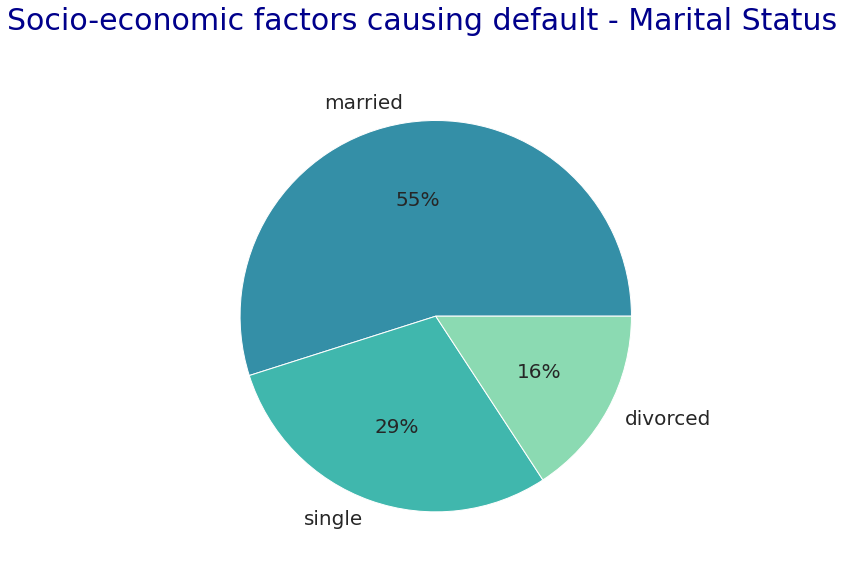

In [ ]:
# Defining size and style of subplots 
sns.set_style("darkgrid")
f, axes = plt.subplots(1, figsize = (15,9))
f.suptitle('Socio-economic factors causing default - Marital Status', fontsize = 30, color = 'darkblue')

#Plotting first graph - Defaulters based on Marital Status
colors = sns.color_palette('mako')[3:7]
plt.pie(data= df_marital, x= 'Percentage of defaulters', labels= 'Marital Status', colors = colors, autopct='%.0f%%', textprops={'fontsize': 20})
plt.show()

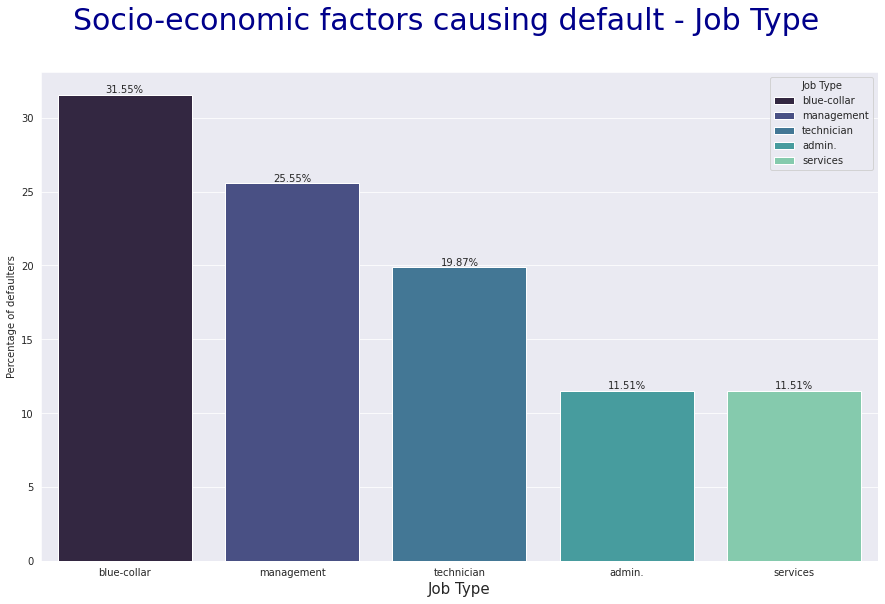

In [ ]:
# Defining size and style of subplots
f, axes = plt.subplots(1, figsize = (15,9))
f.suptitle('Socio-economic factors causing default - Job Type', fontsize = 30, color = 'darkblue')

# Plotting second graph - Defaulters based on Jop Type
fig1 = sns.barplot(x= "Job Type", y ="Percentage of defaulters", hue='Job Type', dodge=False,  data = df_job, palette = 'mako')
axes.set_xlabel("Job Type", fontsize = 15)
for p in fig1.patches:
    height = (p.get_height())
    fig1.annotate('{}%'.format(height),xy=(p.get_x() + (p.get_width() / 2), height), ha='center', va='bottom')

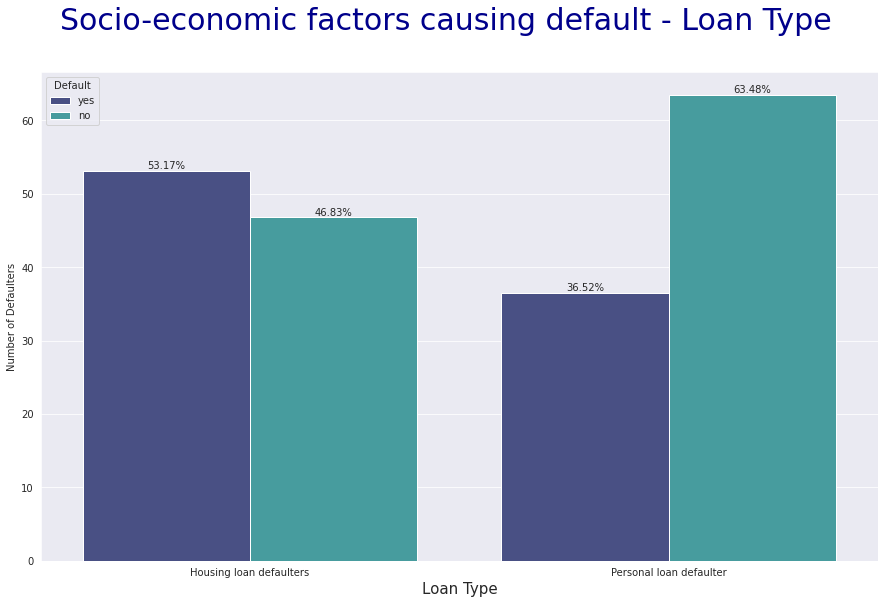

In [ ]:
# Defining size and style of subplots
f, axes = plt.subplots(1, figsize = (15,9))
f.suptitle('Socio-economic factors causing default - Loan Type', fontsize = 30, color = 'darkblue')

# Plotting third graph -  Defaulters based on Loan Type
fig2 = sns.barplot (x = "variable", y = "value", hue = "Default", data = df_grouped, ci = None, palette = 'mako')
axes.set_ylabel("Number of Defaulters")
axes.set_xlabel("Loan Type", fontsize = 15)
for p in fig2.patches:
    height = (p.get_height())
    fig2.annotate('{}%'.format(height),xy=(p.get_x() + (p.get_width() / 2), height), ha='center', va='bottom')


**Inference**

Customers who are **Married**, work a **blue-collar job** or have a **housing loan** are most likely to default. 

54.97% of defaulted customers are married. Married individuals tend to have a more expensive lifestyle, either due to children or added responsibilities like education, diseases treatment. The affair of family members can easily add financial burden on them and go broke.
 
31.21% of defaulted customers work a blue-collar job. Blue-collar jobs generally have a lower pay. However, demand for these jobs are most in metropolitan cities where the cost of living is quite high. What's more, the consumption habits of them determined by education level may result in extra entertainment spending on drinking, smoking. They also have high dependence on welfare subsidies which are frequently influenced by policies. These factors foster poor financial conditions for individuals with blue-collar jobs and lead to defaulting. 

53.37% of defaulters have a housing loan. Between customers having a housing loan versus personal loan, customers with housing loan are more likely to defualt. This can be attributed to the fact that people generally take out a large amount for housing loan as compared to personal loans and large proportion of income need to pay the monthly payments. 



### **Heatmap to analyze correlation between various socio-economic parameters** 

Before proceeding to build the machine learning model, we would like to understand how the different variables are correlated to each other.

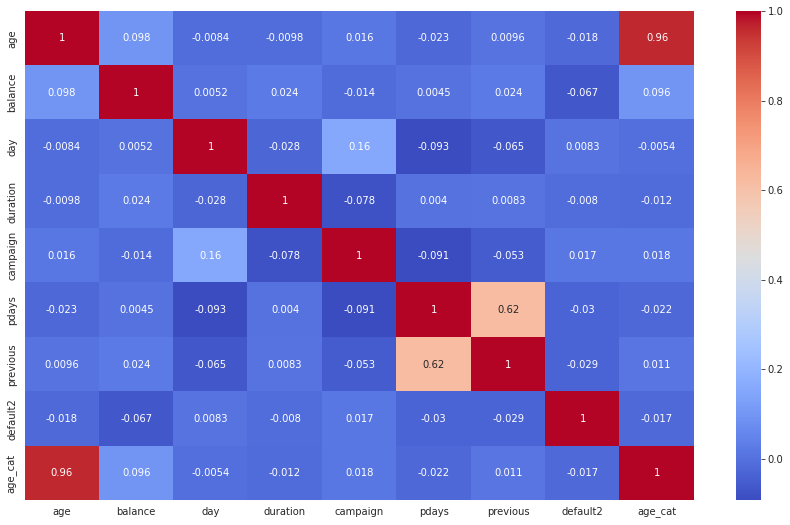

In [ ]:
# Plotting a heat map to show the correlation between every column 
plt.figure(figsize=(15,9)) # setting up the figure size
# plotting the graph
sns.heatmap(data=df.corr(),cmap='coolwarm',annot=True);


**Inference**

The above heatmap indicates that none of the socio-economic parameters are significantly correlated to the target variable.

However, that does not mean that any of the variables are redundant, it just means that they are not correlated. This in no way diminishes the importance of any of the varibales. 

Every column has unique properties and would contribute to the prediction model in its own way.

## **Machine Learning Models**

**Data Pre-processing for ML model implementation**
<br>
These steps would include: 
- Creation of dummy columns
- Separating independent variables from target variables
- Splitting into testing and training dataset 
- Standard scaling of training and testing dataset

**Encoding Categorical data**
<br>
We are encoding categorical data to numerical values using dummies. This will enable us to perform statistical inferences and ML implementations on the data.  

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit,default2,age_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,other,no,0,4.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,other,no,0,3.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,other,no,0,2.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,other,no,0,3.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,other,no,0,2.0


In [ ]:
# Making a separate copy so that our original dataframe doesn't get hampered.
df2 = df.copy()

# Checking the head
df2.head()

# Checking unique categories for day column
df2['day'].unique()

# Renaming columns for the new copy dataframe
df2.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Term Deposit', 'default2', 'age_cat']

# Using pandas function get_dummies to get numerical dummy values for categorical variables
df2 = pd.get_dummies(data=df2,columns=['job','marital','education','housing','loan','contact','month','poutcome','Term Deposit'],drop_first=True)

# Checking the head
df2.head()

,age,default,balance,day,duration,campaign,pdays,previous,default2,age_cat,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Term Deposit_yes
0,58,no,2143,5,261,1,-1,0,0,4.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,44,no,29,5,151,1,-1,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,33,no,2,5,76,1,-1,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,47,no,1506,5,92,1,-1,0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,33,no,1,5,198,1,-1,0,0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


We can see that all the categorical columns are split into their dummy columns. A categorical n different categories get split into n-1 dummy columns. 

In [ ]:
# Setting max columns to None 
pd.set_option('max_columns',None)

# Checking unique categories for month variable
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

**Analyze correlation between target variable and transformed variables**

In [ ]:
100 * df2.corr()['default2'].sort_values()[:-1]

balance               -6.676832
pdays                 -3.028083
previous              -2.928494
poutcome_success      -2.338077
Term Deposit_yes      -2.184060
age                   -1.784624
age_cat               -1.746359
month_oct             -1.734259
contact_telephone     -1.679818
job_student           -1.621904
education_tertiary    -1.532857
marital_married       -1.471473
month_mar             -1.399750
month_sep             -1.373301
job_retired           -1.113305
month_dec             -0.927687
month_feb             -0.877573
duration              -0.800018
month_aug             -0.790545
month_jan             -0.769842
job_unknown           -0.664169
housing_yes           -0.637668
job_technician        -0.410565
month_may             -0.256931
job_management        -0.256034
education_unknown     -0.172068
job_services          -0.055937
job_housemaid         -0.018045
marital_single         0.317563
job_self-employed      0.445664
month_nov              0.590238
job_unem

We now see higher correlation between some of the variables such as job_entrepreuner and loan_yes with default. We have achieved the results we expected to see after converting categrical values to numerical. These variables will be crucial in building our model and analysis.

In [ ]:
# Checking the head
df2.head()

,age,default,balance,day,duration,campaign,pdays,previous,default2,age_cat,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Term Deposit_yes
0,58,no,2143,5,261,1,-1,0,0,4.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,44,no,29,5,151,1,-1,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,33,no,2,5,76,1,-1,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,47,no,1506,5,92,1,-1,0,0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,33,no,1,5,198,1,-1,0,0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


Checking what percentage of our target column has default as 'yes' and what has 'no'.

In [ ]:
(len(df[df['default'] == 'yes']) / len(df)) * 100
(len(df[df['default'] == 'no']) / len(df)) * 100

98.20003130380341

We observe that our target column is heavily imbalanced with default = 'no' having almost 98% of all values while default == 'yes' has only 2%. In this case, metrics like accuracy will fail because the ML model will have a high bias towards default == 'no' as that is the majority class. 
<br><br>
So we have to stick with metrics like F-1 score, which is the harmonic mean of precision and recall. 
<br>
precision: The quality, condition, or fact of being exact and accurate.(1) 
<br>recall: bring (a fact, event, or situation) back into one's mind; remember. (2)
<br><br>
References: 
<br> (1) [Precision Definition](https://languages.oup.com/google-dictionary-en/)
<br> (2) [Recall Definition](https://languages.oup.com/google-dictionary-en/)


 **Resampling Dataset**
<br>
The better approach would be to resample our dataset, that is making a new dataset out of the original dataframe. 
<br>
There are three ways of resampling <br>
1. Undersampling
  <br>In this approach, we take all the samples from the minority class which in this case default == 'yes' and then we sample data from the majority class in such a way that the resulting dataframe gets balanced (ratios like 50% -50% or 60% - 40% are usually acceptable). The downside of this approach is we get low number of samples to train our ML model on. However, all of our values are unique and no replication has occurred. <br>
2.Oversampling
  <br>In this approach we oversample the minority class (usually by duplication) and make it comparable to the length of majority class. However, the downside to this approach is using some duplicate values of minority class but we get a higher number of samples to train our ML model on. <br>
3. SMOTE
<br> SMOTE stands for Synthetic Minority Oversampling Technique (1) 
In this approach, we take a hybrid model of undersampling as well as oversampling by randomly generating few points and marking them as minority class, that is default == 'yes'. By this, we will achieve high number of samples as well as some unique points. Our ML model will have a high number of samples to be trained on as well as we will have some unique values. 

<br>
We will try all these three approaches and choose the approach that works the best.

References: (1) [SMOTE abbreviation](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) 

#### **1. Undersampling**

**60-40 ratio**

We are aiming for a 60%-40% ratio for target varibale (60% default == 'no', 40% default == 'yes')
<br>
This is being done to mimick the original dataset in a very crude form. 

In [ ]:
len(df[df['default'] == 'yes'])

805

Since we have only 805 samples of default == 'yes', by doing some calculation, we get to know, that to make a 60%-40% distribution we have to take approximately 1205 samples from majority class and all 805 samples from minority class. 

In [ ]:
# Separating out the majority class
df_no = df[df['default']=='no']

#Randomly selecting 1215 samples to meet the ratio
df_no = df_no.sample(1205,random_state=42)

# Separating out the minority class
df_yes = df[df['default']=='yes']

#Concatenating the two DFs to achieve the undersampled DF
df_undersample_1 =pd.concat([df_yes,df_no],axis=0)

df_undersample_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term Deposit,default2,age_cat
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,other,no,1,3.0
79,55,services,divorced,secondary,yes,1,yes,no,unknown,5,may,208,1,-1,0,other,no,1,4.0
338,51,admin.,single,secondary,yes,-2,no,no,unknown,5,may,402,3,-1,0,other,no,1,4.0
419,33,technician,married,secondary,yes,72,yes,no,unknown,6,may,623,1,-1,0,other,no,1,2.0
458,33,blue-collar,single,secondary,yes,-60,no,no,unknown,6,may,243,1,-1,0,other,no,1,2.0


In [ ]:
# taking the head of undersampled data
df_undersample_1.head() 

# checking the info of undersampled data
df_undersample_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 7 to 859
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           2010 non-null   int64  
 1   job           2010 non-null   object 
 2   marital       2010 non-null   object 
 3   education     2010 non-null   object 
 4   default       2010 non-null   object 
 5   balance       2010 non-null   int64  
 6   housing       2010 non-null   object 
 7   loan          2010 non-null   object 
 8   contact       2010 non-null   object 
 9   day           2010 non-null   int64  
 10  month         2010 non-null   object 
 11  duration      2010 non-null   int64  
 12  campaign      2010 non-null   int64  
 13  pdays         2010 non-null   int64  
 14  previous      2010 non-null   int64  
 15  poutcome      2010 non-null   object 
 16  Term Deposit  2010 non-null   object 
 17  default2      2010 non-null   int64  
 18  age_cat       2010 non-null  

Now we shall move towards implementing Machine Learning algorithms on the undersampled dataset. `**
However, before that we need to process data such that it becomes suitable for the ML model to get deployed on. This includes various steps, such as:<br> 
1. Segregating independent columns from tagret column. <br>
2. Splitting the data into training and test data set (randomly sampled). <br>
3. Scaling the data appropriately. <br>
4. Implementing the ML model and evaluating its performance on test data.

In [ ]:
df_undersample_2 = df_undersample_1.copy() # making a copy of undersampled data to do more mathematical operations and to keep the original undersampled data intact a

**We will segregate the independent columns from the dependent column (or target column). We will also remove unncessary columns from the dataframe containing independent column**

In [ ]:
X = df_undersample_2.drop(['default','default2','age_cat'],axis=1) # creating a dataframe containing only containing independent columns and removing all unncessary columns.
y = df_undersample_2['default'] # segregating target column

X.info() # checking the info of the 'X' dataframe which consists of only important independent columns

# Since Ml models only take in numerical data, hence we are taking dummies of all categorical data. 
X2 = pd.get_dummies(data=X , columns= ['job','marital','education','housing','loan','contact','month','poutcome','Term Deposit'],drop_first=True)

#X2.head()

# Importing the train_test_split function to split the data into train and test split
from sklearn.model_selection import train_test_split 

# Splitting the undersample data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

# Importing the function to do Standard scaling
from sklearn.preprocessing import StandardScaler

# creating the instance of StandardScaler function so that the model does not get inclined towards any particular column (due to its high numerical value)
sc = StandardScaler() 

# Fitting and transforming the training undersampled dataset using the standard scaling instance created above. We are just "transforming" the test set in order to avoid any data leakage
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape # Checking the shape of the training dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 7 to 859
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           2010 non-null   int64 
 1   job           2010 non-null   object
 2   marital       2010 non-null   object
 3   education     2010 non-null   object
 4   balance       2010 non-null   int64 
 5   housing       2010 non-null   object
 6   loan          2010 non-null   object
 7   contact       2010 non-null   object
 8   day           2010 non-null   int64 
 9   month         2010 non-null   object
 10  duration      2010 non-null   int64 
 11  campaign      2010 non-null   int64 
 12  pdays         2010 non-null   int64 
 13  previous      2010 non-null   int64 
 14  poutcome      2010 non-null   object
 15  Term Deposit  2010 non-null   object
dtypes: int64(7), object(9)
memory usage: 267.0+ KB


(1346, 41)

**Now for verifying our results on the original data, we will also create a copy of the original dataframe**

In [ ]:
X_for_actual_test = df.copy() # Creating a copy of the original dataframe in order to measure the model's performance on the original

X_for_actual_test.drop(['default2','age_cat'],inplace=True,axis=1) # Dropping the unneccessary column

# Segregating the original dataframe's independent and dependent columns to use in further analysis
X_for_actual_test_real = X_for_actual_test.drop('default',axis=1)
y_for_actual_test_real = X_for_actual_test['default']

X_for_actual_test_real.head() # taking the head of original data's test dataframe

# taking the dummies of test data's column for analysis (to check ML model's accuracy on orignal dataframe's test set)
X_for_actual_test_real = pd.get_dummies(data=X_for_actual_test_real , columns=['job','marital','education','housing','loan','contact','month','poutcome','Term Deposit'],drop_first=True)

X_for_actual_test_real = sc.transform(X_for_actual_test_real) # scaling the test data

X_for_actual_test_real.shape # checking the test data's shape

y_for_actual_test_real.shape

# Importing the important metrics which we shall be using in order to evaluate our ML model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score, make_scorer, roc_auc_score

from sklearn.model_selection import cross_val_score, cross_validate

scoring = {'accuracy' : make_scorer(accuracy_score), 'f1_score' : make_scorer(f1_score)}

y_hat = df['default2'] # taking the numerical values of default from original dataframe

100 * df_undersample_1.corr()['default2'].sort_values()[:-1] # checking the correlation percentage of each column with the 'default' column in undersampled dataset

balance    -27.420013
previous   -10.700183
pdays      -10.552801
age_cat     -8.118862
age         -7.761777
duration    -2.726210
day          3.017538
campaign     4.197564
Name: default2, dtype: float64

**Achieved relatively high correlation wiht respect to our target variables**

In [ ]:
# Importing MinMaxScaler to 'Normalize' the data and creating an instance of it
from sklearn.preprocessing import MinMaxScaler
mmt = MinMaxScaler()

# Fitting and transforming the data using 'Normalization' function. We are just "transforming" the test set in order to avoid any data leakage
X_train_2 = mmt.fit_transform(X_train)
X_test_2 = mmt.transform(X_test)

#### ML Algorithm implementation for classification of Undersampled dataset

**Random Forest Model**

 Random Forest is an "ensemble learning" algorithm which can be used for both classification as well as regression. Here we are using it for classification (as our use case is classification). This algorithm creates an ensemble of various "Decision Trees" (which work on creating a "split" based on various parameteric values)

**Creating the Random Forest model**

In [ ]:
# Importing the Random Forest classification function
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating a random forest instance and setting up the hyperparameters
rf = RandomForestClassifier(n_estimators=1000,random_state=42,criterion='entropy') 

**Fitting the Model**

In [ ]:
# Fitting the model on the training dataset
rf.fit(X_train_2,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

**Predicting on undersampled test set**

In [ ]:
# Using the model to predict on the test data
rf_pred = rf.predict(X_test_2)

**Evaluating the model on the undersampled test set**

In [ ]:
print(classification_report(y_test,rf_pred),end='\n') # Printing a classification report
print(confusion_matrix(y_test,rf_pred),end='\n')
print(accuracy_score(y_test,rf_pred),end='\n')

              precision    recall  f1-score   support

          no       0.82      0.81      0.82       395
         yes       0.73      0.75      0.74       269

    accuracy                           0.78       664
   macro avg       0.78      0.78      0.78       664
weighted avg       0.79      0.78      0.79       664

[[320  75]
 [ 68 201]]
0.7846385542168675


##### Result
**On undersampled test data we got an accuracy of 79% and f1-score of 74%. Let's try this Random Forest model on original dataset**

In [ ]:
# Doing predictions on "Normalized" test set of original dataframe
rf_pred_actual = rf.predict(mmt.transform(X_for_actual_test_real))

**Evaluating the model on "Normalized" test dataframe**

In [ ]:
print(classification_report(y_for_actual_test_real,rf_pred_actual),end='\n')
print(confusion_matrix(y_for_actual_test_real,rf_pred_actual),end='\n')
print(accuracy_score(y_for_actual_test_real,rf_pred_actual),end='\n')
f1_score(y_for_actual_test_real,rf_pred_actual,pos_label='yes')

              precision    recall  f1-score   support

          no       1.00      0.84      0.91     43918
         yes       0.09      0.92      0.17       805

    accuracy                           0.84     44723
   macro avg       0.55      0.88      0.54     44723
weighted avg       0.98      0.84      0.90     44723

[[36738  7180]
 [   68   737]]
0.8379357377635669


0.16899793625315296

**On test dataset, Random Forest acieved accuracy of 92% and f1-score of 17%**

#### **2. Oversampling** <br>
Oversampling the minority class and making it approximately equal to the length of majority class using "duplication". 

In [ ]:
df.head() # checking the head of the original dataset

# segregating the minority class and taking half of it randlomly
df_yes = df[df['default']=='yes'].sample(400) 

# segregating the majority class and taking half of it randlomly
df_no = df[df['default']=='no'].sample(20000) 

# length of majority class now
len(df_no)
# length of minority class now 
len(df_yes) 
# checking the ratio of lengths of majority class with minority class
len(df_no)/len(df_yes) 

50.0

Let us concatenate df_yes with itself 45 times, in order to maintain a composition which is similar to the original dataset

In [ ]:
df_yes = pd.concat(([df_yes]*45),axis=0)

# length of oversampled minority class
len(df_yes) 

# concatenating the two dataframes vertically
df_oversample = pd.concat([df_yes,df_no],axis=0)

# length of the oversampled dataframe
len(df_oversample) 

38000

**Moving towards applying ML algorithm on the dataset which we created using oversampling technique. Steps are as follows:** <br>
1. Splitting the data into training and test data set (randomly sampled). <br>
2. Scaling the data appropriately. <br>
3. Implementing the ML model and evaluating its performance on test data.

**Step 1.** Splitting the data into train and test set

In [ ]:
# Segregating out dependent and indepndent columns for ML model implmentation
X_oversample = df_oversample.drop(['default','default2','age_cat'],axis=1)
y_oversample = df_oversample['default']

# taking dummies of all the categorical column
X_oversample_2 = pd.get_dummies(data=X_oversample , columns= ['job','marital','education','housing','loan','contact','month','poutcome','Term Deposit'],drop_first=True)

# checking the shape
X_oversample_2.shape 

# Splitting the oversampled data into train and test set
X_train_oversample, X_test_oversample, y_train_oversample, y_test_oversample = train_test_split(X_oversample_2, y_oversample, test_size=0.33, random_state=42)

# checking the shape of the oversampled train data
X_train_oversample.shape 

# checking the shape of the oversampled test data
X_test_oversample.shape 

(12540, 41)

**Step 2.** Scaling the data appropriately

In [ ]:
# Standard scaling of the train and test set on the oversampled data
X_train_oversample_1 = sc.fit_transform(X_train_oversample)
X_test_oversample_1 = sc.transform(X_test_oversample)

In [ ]:
# Normalized scaling of the train and test set on the oversampled data
X_train_oversample_2 = mmt.fit_transform(X_train_oversample)
X_test_oversample_2 = mmt.transform(X_test_oversample)

### ML Implementatin for classificatin of Oversampled dataset

**Random Forest Model**

In [ ]:
# creating an instance of Random Forest model
rf_oversample = RandomForestClassifier(n_estimators=100,random_state=42,criterion='entropy',class_weight={'yes':0.9,'no':0.1})

# fitting the model on oversampled training set
rf_oversample.fit(X_train_oversample_1,y_train_oversample) 

# predicitng the target variable on oversampled test set
rf_oversample_pred = rf_oversample.predict(X_test_oversample_1) 

# Evaluating the model on oversampled test set
print(classification_report(y_test_oversample,rf_oversample_pred),end='\n')
print(confusion_matrix(y_test_oversample,rf_oversample_pred),end='\n')
print(accuracy_score(y_test_oversample,rf_oversample_pred),end='\n')

rf_oversample_pred_actual = rf_oversample.predict(sc.transform(X_for_actual_test_real)) # predicting the model on original test set

# Evaluating the model on original test set
print(classification_report(y_for_actual_test_real,rf_oversample_pred_actual),end='\n')
print(confusion_matrix(y_for_actual_test_real,rf_oversample_pred_actual),end='\n')
print(accuracy_score(y_for_actual_test_real,rf_oversample_pred_actual),end='\n')
print(f1_score(y_for_actual_test_real,rf_oversample_pred_actual,pos_label='yes'))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      6597
         yes       1.00      1.00      1.00      5943

    accuracy                           1.00     12540
   macro avg       1.00      1.00      1.00     12540
weighted avg       1.00      1.00      1.00     12540

[[6584   13]
 [   0 5943]]
0.99896331738437


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

              precision    recall  f1-score   support

          no       0.98      1.00      0.99     43918
         yes       0.00      0.00      0.00       805

    accuracy                           0.98     44723
   macro avg       0.49      0.50      0.50     44723
weighted avg       0.96      0.98      0.97     44723

[[43918     0]
 [  805     0]]
0.9820003130380341
0.0


##### **Result**

Random Forest using Oversampling achieved 63% f1-score on the original dataset. However, we could notice that this model has a very low recall of 50% and that too because it was trained on it. Hence, this model is not suitable.

### **3. SMOTE**

Synthetic Minority Oversampling Technique (SMOTE) is a resampling technique which oversamples the minority class by "synthesizing" various parameters and creating new data points by using various "data augmentation" techniques. By this, we get enough numbers of minority class data points to sufficiently carry out the learning processes for the ML model. Hence, we avoid data duplication of minority class (which is the case in oversampling).  

Let us recheck the count of 'yes' and 'no' in the original dataframe

In [ ]:
from collections import Counter

In [ ]:
print(Counter(df['default'])) # printing the count of different classes in the orignal dataframe

# Importing the SMOTE function
from imblearn.over_sampling import SMOTE

df2.head() # Checking the head

# Splitting the original set for evalauating the ML model on original dataset
X_for_actual_test_real = X_for_actual_test.drop('default',axis=1)
y_for_actual_test_real = X_for_actual_test['default']

X_for_actual_test_real.head()

X_for_actual_test_real = pd.get_dummies(data=X_for_actual_test_real , columns=['job','marital','education','housing','loan','contact','month','poutcome','Term Deposit'],drop_first=True)

# Setting up a dataframe consisting of only independent columns
X_smote = X_for_actual_test_real 

# Setting up the a series consisting of only the target column
y_smote = y_for_actual_test_real 

# Initializing the SMOTE function. We set our SMOTE function to oversample the minority to the number equal to the majority class. 
#Then, we take 20% of the oversampled minority class (randomly sampled). So, 20% of 43918 = 8783
oversample = SMOTE(sampling_strategy=0.2) 

Counter({'no': 43918, 'yes': 805})


Importing random under-sampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler # importing the required function

In [ ]:
# We shall keep undersampled majority class 50% more than the oversampled minority class. 
# This is being done on order to resemble the composition of original dataframe in the SMOTE's dataframe
undersample = RandomUnderSampler(sampling_strategy=0.5)

**Creating a pipeline**

We will be creating a pipeline to smoothen the process of creating a SMOTE dataset. Firstly, oversampling would be done and then undersampling part would be done. Finally, the pipeline will be fit on the X_smote and y_smote dataset.

In [ ]:
# Importing the pipeline
from imblearn.pipeline import Pipeline 

# steps for pipelining. First "do oversampling of the minority class" and then do "undersampling of the majority class"
steps = [('o',oversample),('u',undersample)] 

# Creating the pipeline instance
pipeline = Pipeline(steps=steps) 

# Fitting the pipeline to our dataset
X_smote, y_smote = pipeline.fit_resample(X_smote,y_smote) 

# Taking a count of target categories in the SMOTE dataset 
print(Counter(y_smote)) 

# Checking the head
X_smote.head() 
# Checking the length of target column created using SMOTE technique
len(y_smote) 

 # Checking the shape of SMOTE dataset which we created
X_smote.shape

Counter({'no': 17566, 'yes': 8783})


(26349, 41)

**Moving towards applying ML algorithm on the dataset which we created using SMOTE technique. Steps are as follows:** <br>
1. Splitting the data into training and test data set (randomly sampled). <br>
2. Scaling the data appropriately. <br>
3. Implementing the ML model and evaluating its performance on test data.

**Step 1.** Splitting the data into training and test data set 

In [ ]:
# Spltting the data into training and test set
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Checking the length of training set
len(X_train_smote) 

# printing the count of categories present in target column
print(Counter(y_train_smote)) 

Counter({'no': 14025, 'yes': 7054})


**Step 2.** Scaling the data appropriately.

In [ ]:
# Standard scaling the data appropriately
X_train_smote_2 = sc.fit_transform(X_train_smote)
X_test_smote_2 = sc.transform(X_test_smote)

# Normalized scaling the data appropriately
X_train_smote_3 = mmt.fit_transform(X_train_smote)
X_test_smote_3 = mmt.transform(X_test_smote)

### ML Implementation for classification of dataset resampled using SMOTE

**Random Forest Model**

In [ ]:
 # Creating the Random Forest instance
rf_smote = RandomForestClassifier(n_estimators=100,random_state=42,class_weight={'yes': 0.9,'no':0.1})

 # fitting the model on SMOTE train set
rf_smote.fit(X_train_smote_2,y_train_smote)

# Predicting on the SMOTE test set
rf_smote_pred = rf_smote.predict(X_test_smote_2) 

In [ ]:
# Printing out the evaluation results for SMOTE test set
print(classification_report(y_test_smote,rf_smote_pred),end='\n')
print(confusion_matrix(y_test_smote,rf_smote_pred),end='\n')
print(accuracy_score(y_test_smote,rf_smote_pred),end='\n')

              precision    recall  f1-score   support

          no       0.95      0.99      0.97      3541
         yes       0.98      0.90      0.94      1729

    accuracy                           0.96      5270
   macro avg       0.96      0.94      0.95      5270
weighted avg       0.96      0.96      0.96      5270

[[3502   39]
 [ 175 1554]]
0.959392789373814


In [ ]:
# Doing prediction on the original test set
rf_smote_pred_actual = rf_smote.predict(sc.transform(X_for_actual_test_real)) 

# Printing out the evaluation results for original test set
print(classification_report(y_for_actual_test_real,rf_smote_pred_actual),end='\n')
print(confusion_matrix(y_for_actual_test_real,rf_smote_pred_actual),end='\n')
print(accuracy_score(y_for_actual_test_real,rf_smote_pred_actual),end='\n')
print(100 * f1_score(y_for_actual_test_real,rf_smote_pred_actual,pos_label='yes'))

              precision    recall  f1-score   support

          no       1.00      0.99      0.99     43918
         yes       0.65      0.82      0.72       805

    accuracy                           0.99     44723
   macro avg       0.82      0.90      0.86     44723
weighted avg       0.99      0.99      0.99     44723

[[43562   356]
 [  148   657]]
0.9887306307716388
72.27722772277228


#### **Result**

Random Forest achieved a **CV accuracy of 99%** and achieved **f1-score of around 70%** on original dataset. Accuracy on original dataset was 97%

## **Validation**

In [ ]:
import random

#Setting the seed
random.seed(42)

# creating testing sample and value
tester_sample = X_for_actual_test_real.sample(1)
tester_value = y_for_actual_test_real.sample(1)

In [ ]:
tester_sample

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Term Deposit_yes
24371,53,1661,17,85,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
tester_value

17050    no
Name: default, dtype: object

In [ ]:
# Running prediction model 
rf_smote.predict(sc.transform(tester_sample))

array(['no'], dtype=object)

**The predictor model is working as intended. This customer has not defaulted, and the model predicts that they would not default as well.**

## **Conclusion**

### **Choosing the right Machine Learning Model** <br>
After comparing all the machine learning model we choose to go with the Random Forest model trained (or built) on SMOTE dataset. This is because it takes into account all the relevant metric (such as precision, recall and f1-score) and gives appropriate weights (or importance) to the two classes, because of which it acheived a high score of precision, recall and f1-score. <br> <br>
We won't consider the Random Forest model built on undersampled dataset as it got trained on very less points, hence, it could not capture the essence of the dataset and the model sufferred the issue of "underfitting". <br><br>
We won't consider the Random Forest model built on overersampled dataset as it got trained too many "duplicated" points, thus, the model could not capture the tendencies of defaulting and only predicited those points on which it got trained. So, when we tested the model on the oversampled test set, it "overfit". 

### **Recommendations and Future Work** 
Based on the prediction made by the model, the firm can make appropriate decisions about offering credit cards or loan to the customer. 

Customers falling under categories with high likelihood of defaulting such as married, working blue-collar jobs or having a housing loan could be offered higher interest rates. This would ensure reduced risks for the firm and greater caution towards these customers. 

This model can be built into an interface which allows executives to input information about a new customer and would predict in real-time, whether the customer is likely to default on credit card or loan payments.
